In [1]:
import pandas as pd
from langdetect import detect
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
df = pd.read_csv("/home/zlata/SciSumm-RAG/data/final_corpus.csv")

In [3]:
df['body_len'] = df['body'].str.split().str.len()
df['abstract_len'] = df['abstract'].str.split().str.len()

In [4]:
summary = pd.DataFrame({
    'Metric': ['Mean', 'Median', 'Std', 'Min', 'Max'],
    'Body Length': [
        df['body_len'].mean(),
        df['body_len'].median(),
        df['body_len'].std(),
        df['body_len'].min(),
        df['body_len'].max(),
    ],
    'Abstract Length': [
        df['abstract_len'].mean(),
        df['abstract_len'].median(),
        df['abstract_len'].std(),
        df['abstract_len'].min(),
        df['abstract_len'].max(),
    ]
})

print(summary)

   Metric    Body Length  Abstract Length
0    Mean    5256.205821       100.037422
1  Median    4146.000000       100.000000
2     Std    6153.417279        38.440466
3     Min     151.000000        10.000000
4     Max  113316.000000       186.000000


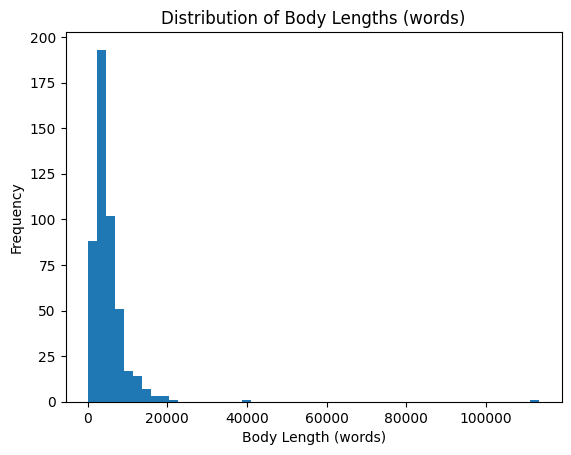

In [5]:
plt.figure()
plt.hist(df['body_len'], bins=50)
plt.title('Distribution of Body Lengths (words)')
plt.xlabel('Body Length (words)')
plt.ylabel('Frequency')
plt.show()

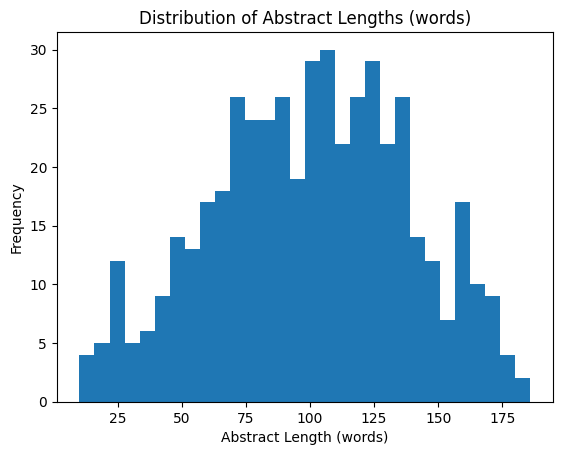

In [6]:
plt.figure()
plt.hist(df['abstract_len'], bins=30)
plt.title('Distribution of Abstract Lengths (words)')
plt.xlabel('Abstract Length (words)')
plt.ylabel('Frequency')
plt.show()

In [7]:
def safe_detect(text):
    try:
        return detect(text[:2000])
    except:
        return 'unknown'

df['lang'] = df['body'].apply(safe_detect)

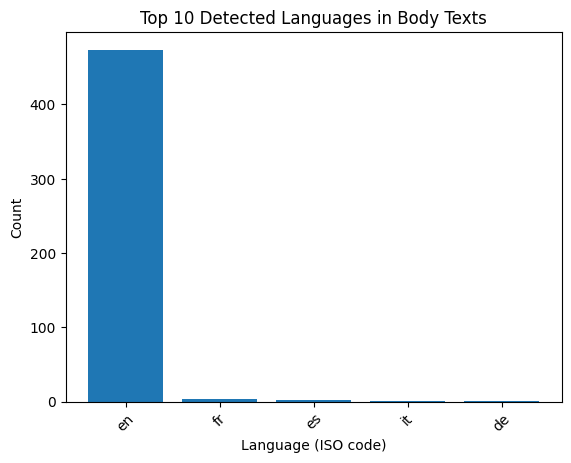

In [8]:
lang_counts = df['lang'].value_counts().head(10)

plt.figure()
plt.bar(lang_counts.index, lang_counts.values)
plt.title('Top 10 Detected Languages in Body Texts')
plt.xlabel('Language (ISO code)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()